# Investigating Delays due to Weather

The dataset itself has an attribute **WEATHER_DELAY** that indicates the minutes in which a flight is delayed due to weather issues.  

In [1]:
!pip install meteostat

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("FLIGHTS.csv")
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,ARR_TIME,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,index
0,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10423,1042302,"Austin, TX",700,707.0,7.0,0.0,0.0,950.0,15.0,1.0,1.0,0.0,NaN,95.0,103.0,619.0,7.0,0.0,8.0,0.0,0.0,0
1,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10423,1042302,"Austin, TX",1830,1826.0,0.0,0.0,-1.0,2112.0,2.0,0.0,0.0,0.0,NaN,100.0,106.0,619.0,0.0,0.0,0.0,0.0,0.0,1
2,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10800,1080003,"Burbank, CA",1420,1426.0,6.0,0.0,0.0,1516.0,0.0,0.0,-1.0,0.0,NaN,130.0,110.0,672.0,0.0,0.0,0.0,0.0,0.0,2
3,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10821,1082106,"Baltimore, MD",1500,1514.0,14.0,0.0,0.0,2050.0,15.0,1.0,1.0,0.0,NaN,215.0,216.0,1670.0,14.0,0.0,1.0,0.0,0.0,3
4,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",11259,1125904,"Dallas, TX",530,527.0,0.0,0.0,-1.0,805.0,0.0,0.0,-1.0,0.0,NaN,105.0,98.0,580.0,0.0,0.0,0.0,0.0,0.0,4


## Explore the general distribution of delayed minutes due to weather

In [4]:
df[df['WEATHER_DELAY'] > 0.0] #95726 flights that were delayed due to the weather

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,ARR_TIME,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,index
849,2024,1,1,1,1,19393,11140,1114008,"Corpus Christi, TX",12191,1219103,"Houston, TX",700,813.0,73.0,1.0,4.0,913.0,73.0,1.0,4.0,0.0,NaN,60.0,60.0,187.0,0.0,73.0,0.0,0.0,0.0,849
3935,2024,1,1,1,1,19393,14908,1490803,"Santa Ana, CA",14831,1483106,"San Jose, CA",1030,1202.0,92.0,1.0,6.0,1311.0,81.0,1.0,5.0,0.0,NaN,80.0,69.0,342.0,0.0,81.0,0.0,0.0,0.0,3935
4385,2024,1,1,1,1,19690,14747,1474703,"Seattle, WA",12173,1217305,"Honolulu, HI",715,736.0,21.0,1.0,1.0,1202.0,32.0,1.0,2.0,0.0,NaN,375.0,386.0,2677.0,11.0,21.0,0.0,0.0,0.0,4385
5523,2024,1,1,1,1,19790,11603,1160302,"Eugene, OR",14747,1474703,"Seattle, WA",625,1418.0,473.0,1.0,12.0,1548.0,473.0,1.0,12.0,0.0,NaN,90.0,90.0,234.0,0.0,473.0,0.0,0.0,0.0,5523
5606,2024,1,1,1,1,19790,11884,1188402,"Spokane, WA",14747,1474703,"Seattle, WA",1005,1458.0,293.0,1.0,12.0,1607.0,266.0,1.0,12.0,0.0,NaN,96.0,69.0,224.0,0.0,266.0,0.0,0.0,0.0,5606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7546571,2024,4,12,31,2,20436,11292,1129202,"Denver, CO",14107,1410702,"Phoenix, AZ",2220,2238.0,18.0,1.0,1.0,115.0,53.0,1.0,3.0,0.0,NaN,122.0,157.0,602.0,0.0,18.0,35.0,0.0,0.0,7546571
7546579,2024,4,12,31,2,20436,11292,1129202,"Denver, CO",14771,1477104,"San Francisco, CA",2225,2234.0,9.0,0.0,0.0,42.0,21.0,1.0,1.0,0.0,NaN,176.0,188.0,967.0,0.0,9.0,12.0,0.0,0.0,7546579
7546701,2024,4,12,31,2,20436,12953,1295304,"New York, NY",11298,1129806,"Dallas/Fort Worth, TX",2259,323.0,264.0,1.0,12.0,626.0,256.0,1.0,12.0,0.0,NaN,251.0,243.0,1389.0,0.0,256.0,0.0,0.0,0.0,7546701
7546884,2024,4,12,31,2,20436,14635,1463502,"Fort Myers, FL",11193,1119302,"Cincinnati, OH",1634,1714.0,40.0,1.0,2.0,1941.0,33.0,1.0,2.0,0.0,NaN,154.0,147.0,879.0,0.0,13.0,0.0,0.0,20.0,7546884


In [5]:
print(df['WEATHER_DELAY'].describe())
print('\n')
print(df[df['WEATHER_DELAY'] > 0.0]['WEATHER_DELAY'].describe())

count    7.546988e+06
mean     9.005415e-01
std      1.585831e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.419000e+03
Name: WEATHER_DELAY, dtype: float64


count    95726.000000
mean        70.998224
std        121.862120
min          1.000000
25%         14.000000
50%         33.000000
75%         79.000000
max       2419.000000
Name: WEATHER_DELAY, dtype: float64


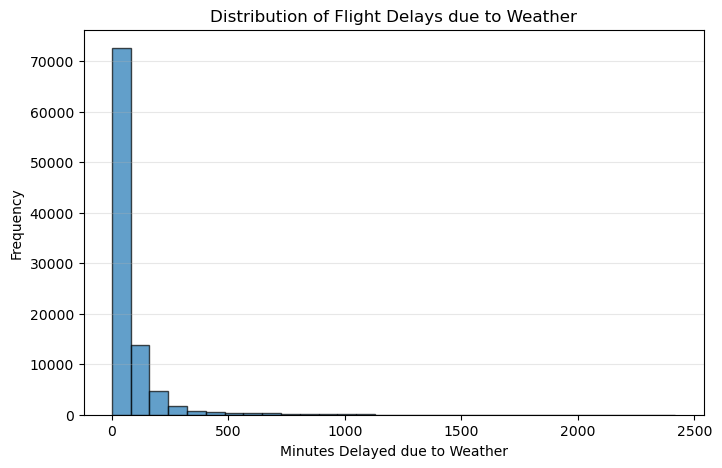

In [6]:
plt.figure(figsize=(8, 5))
plt.hist(df[df['WEATHER_DELAY'] > 0.0]['WEATHER_DELAY'].dropna(), bins=30, edgecolor='black', alpha=0.7)

plt.title('Distribution of Flight Delays due to Weather')
plt.xlabel('Minutes Delayed due to Weather')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()

### Eliminating outliers

From the above histogram, we see that most of the delays are concentrated at very low minutes, but there are a few that are outliers (the max delayed minutes being 2419 minutes). To account for that, we can plot only the 99th quantile of values.

<Axes: xlabel='WEATHER_DELAY', ylabel='Count'>

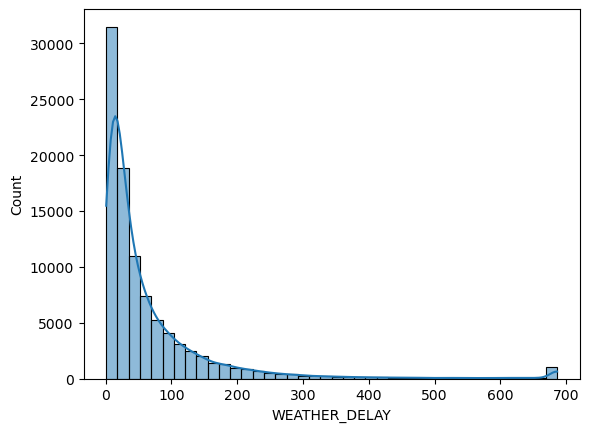

In [7]:
cap = df[df['WEATHER_DELAY'] > 0.0]['WEATHER_DELAY'].quantile(0.99)
sns.histplot(df[df['WEATHER_DELAY'] > 0.0]['WEATHER_DELAY'].clip(upper=cap), bins=40, kde=True)

In [9]:
df_airport_names = pd.read_csv("L_AIRPORT_ID.csv")
df_airport_names.shape

(6812, 2)

In [10]:
df_airline_names = pd.read_csv("L_AIRLINE_ID.csv")
df_airline_names.shape

(1772, 2)

In [11]:
airports = df_airport_names.drop_duplicates('Code').set_index('Code')['Description']
airlines = df_airline_names.drop_duplicates('Code').set_index('Code')['Description']

df['DEST_AIRPORT_NAME'] = df['DEST_AIRPORT_ID'].map(airports)
df['AIRLINE_NAME'] = df['MKT_CARRIER_AIRLINE_ID'].map(airlines)
df['ORIGIN_AIRPORT_NAME'] = df['ORIGIN_AIRPORT_ID'].map(airports)

df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,ARR_TIME,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,index,DEST_AIRPORT_NAME,AIRLINE_NAME,ORIGIN_AIRPORT_NAME
0,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10423,1042302,"Austin, TX",700,707.0,7.0,0.0,0.0,950.0,15.0,1.0,1.0,0.0,NaN,95.0,103.0,619.0,7.0,0.0,8.0,0.0,0.0,0,"Austin, TX: Austin - Bergstrom International",Southwest Airlines Co.: WN,"Albuquerque, NM: Albuquerque International Sun..."
1,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10423,1042302,"Austin, TX",1830,1826.0,0.0,0.0,-1.0,2112.0,2.0,0.0,0.0,0.0,NaN,100.0,106.0,619.0,0.0,0.0,0.0,0.0,0.0,1,"Austin, TX: Austin - Bergstrom International",Southwest Airlines Co.: WN,"Albuquerque, NM: Albuquerque International Sun..."
2,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10800,1080003,"Burbank, CA",1420,1426.0,6.0,0.0,0.0,1516.0,0.0,0.0,-1.0,0.0,NaN,130.0,110.0,672.0,0.0,0.0,0.0,0.0,0.0,2,"Burbank, CA: Bob Hope",Southwest Airlines Co.: WN,"Albuquerque, NM: Albuquerque International Sun..."
3,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10821,1082106,"Baltimore, MD",1500,1514.0,14.0,0.0,0.0,2050.0,15.0,1.0,1.0,0.0,NaN,215.0,216.0,1670.0,14.0,0.0,1.0,0.0,0.0,3,"Baltimore, MD: Baltimore/Washington Internatio...",Southwest Airlines Co.: WN,"Albuquerque, NM: Albuquerque International Sun..."
4,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",11259,1125904,"Dallas, TX",530,527.0,0.0,0.0,-1.0,805.0,0.0,0.0,-1.0,0.0,NaN,105.0,98.0,580.0,0.0,0.0,0.0,0.0,0.0,4,"Dallas, TX: Dallas Love Field",Southwest Airlines Co.: WN,"Albuquerque, NM: Albuquerque International Sun..."


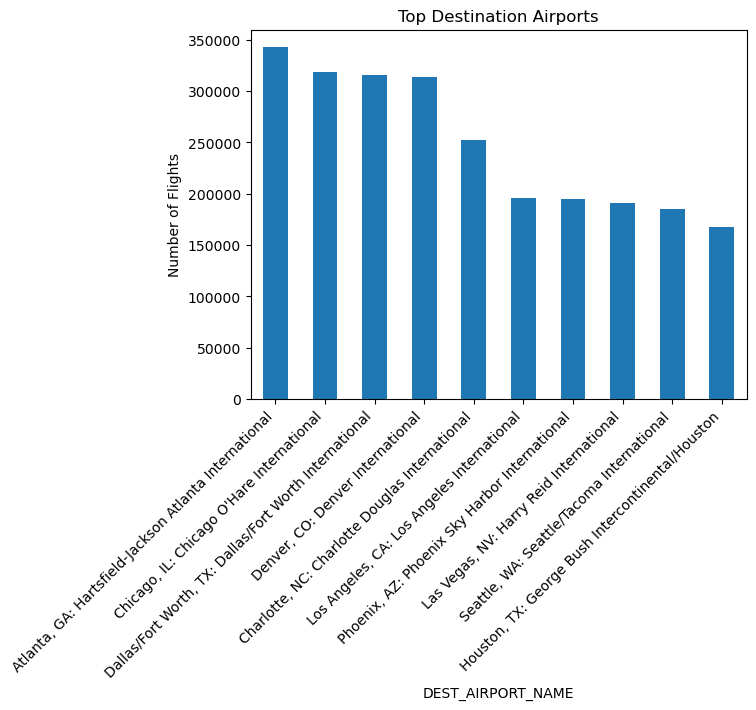

In [12]:
df['DEST_AIRPORT_NAME'].value_counts().head(10).plot(kind='bar', title='Top Destination Airports')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Flights')
plt.show()

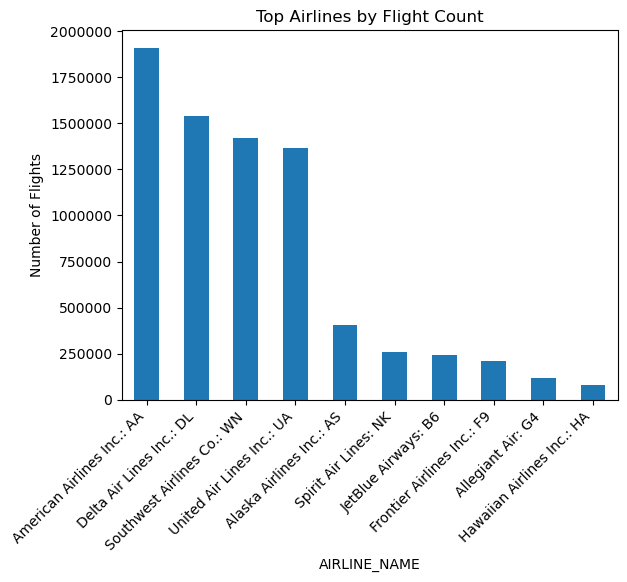

In [13]:
ax = df['AIRLINE_NAME'].value_counts().head(10).plot(
    kind='bar',
    title='Top Airlines by Flight Count'
)
ax.ticklabel_format(style='plain', axis='y')  # <-- disables scientific notation
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Flights')
plt.show()

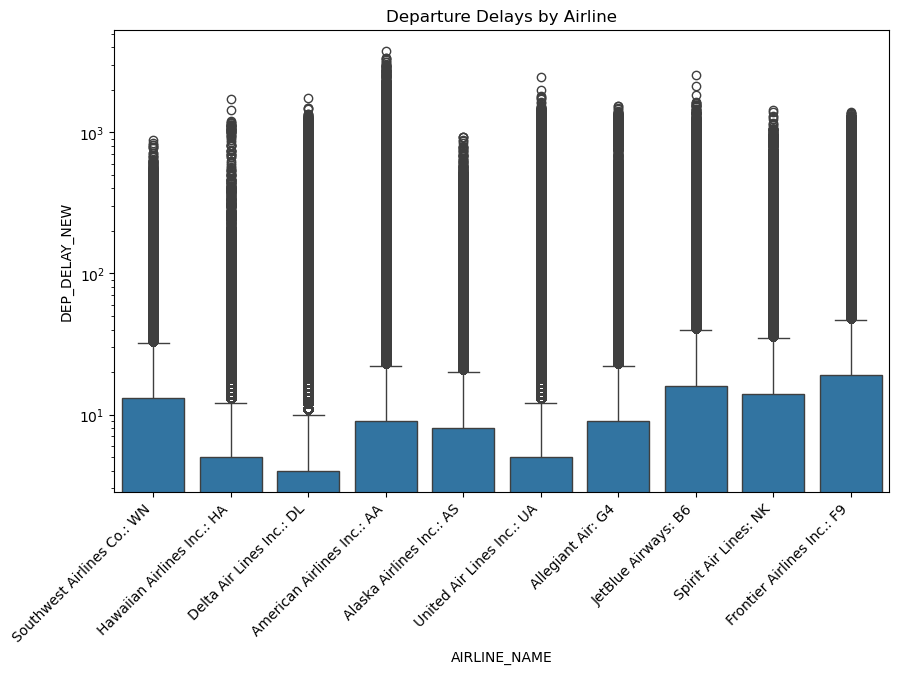

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='AIRLINE_NAME', y='DEP_DELAY_NEW')
plt.title('Departure Delays by Airline')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.show()

/var/folders/h1/w_jtl0654ns96y8ngd075fj40000gn/T/ipykernel_26850/39024638.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


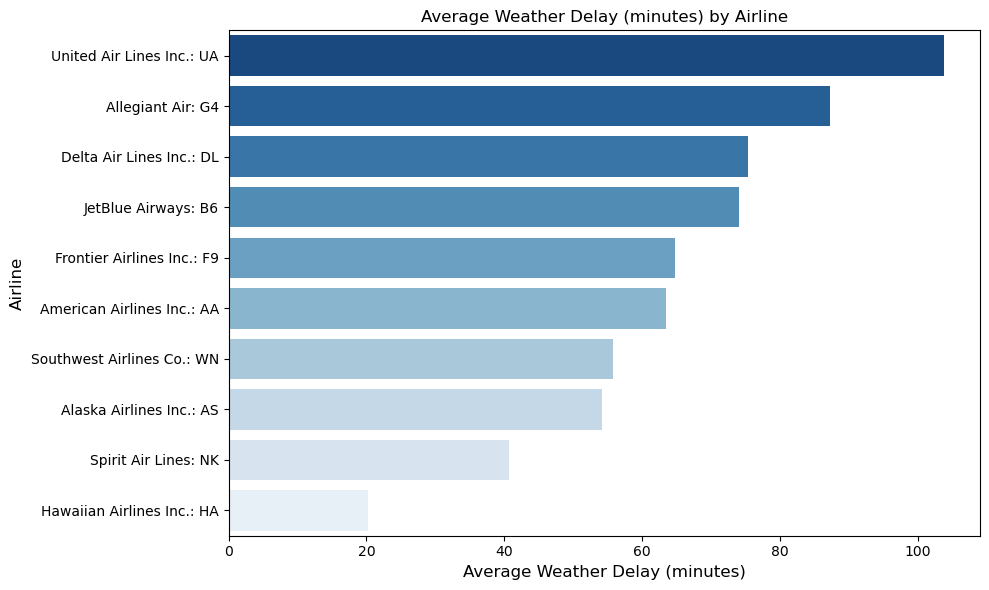

In [15]:
weather_delayed = df[df['WEATHER_DELAY'] > 0]

# Compute average weather delay per airline
avg_weather_delay = (
    weather_delayed.groupby('AIRLINE_NAME')['WEATHER_DELAY']
    .mean()
    .sort_values(ascending=False)
)

# Optional: limit to top N for readability
topN = 15
avg_weather_delay = avg_weather_delay.head(topN)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=avg_weather_delay.values,
    y=avg_weather_delay.index,
    orient='h',
    palette='Blues_r'
)

plt.title('Average Weather Delay (minutes) by Airline')
plt.xlabel('Average Weather Delay (minutes)', fontsize=12)
plt.ylabel('Airline', fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/h1/w_jtl0654ns96y8ngd075fj40000gn/T/ipykernel_26850/2161877190.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


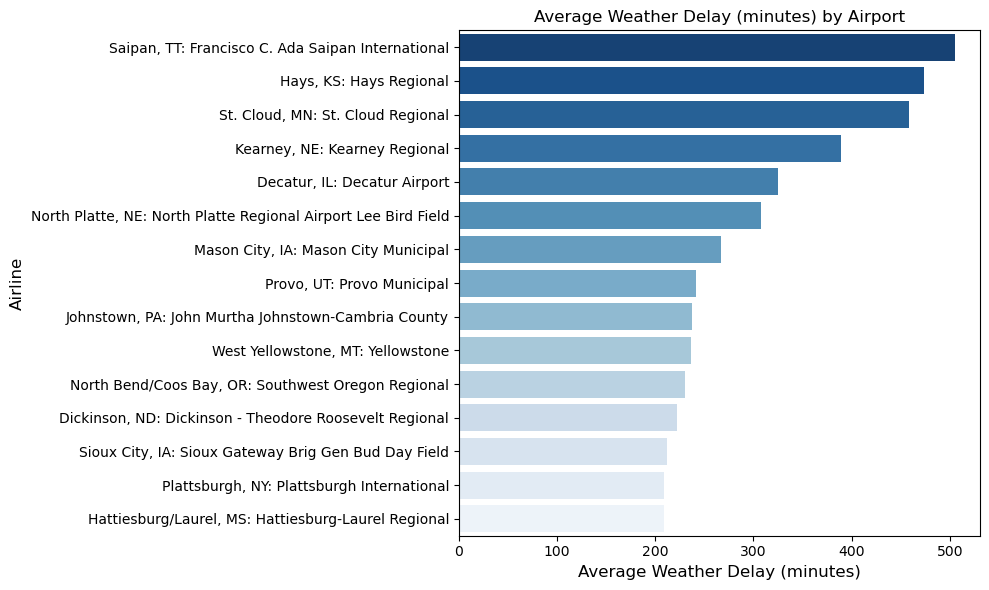

In [16]:
# Compute average weather delay per airline
avg_weather_delay = (
    weather_delayed.groupby('ORIGIN_AIRPORT_NAME')['WEATHER_DELAY']
    .mean()
    .sort_values(ascending=False)
)

# Optional: limit to top N for readability
topN = 15
avg_weather_delay = avg_weather_delay.head(topN)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=avg_weather_delay.values,
    y=avg_weather_delay.index,
    orient='h',
    palette='Blues_r'
)

plt.title('Average Weather Delay (minutes) by Airport')
plt.xlabel('Average Weather Delay (minutes)', fontsize=12)
plt.ylabel('Airline', fontsize=12)
plt.tight_layout()
plt.show()

- Saipan International Airport is in the Northern Mariana Islands, United States but located near East Asia
- Hays regional is in Kansas and only runs one airline– United 

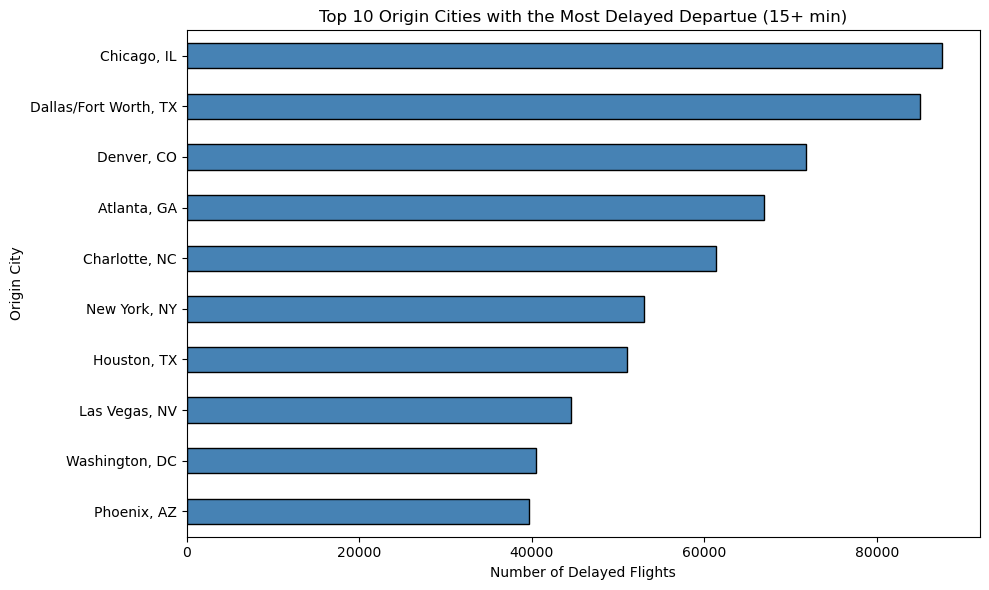

In [26]:
delayed_flights = df_completed[df_completed["DEP_DEL15"] == 1]

# Count number of delays per destination city
delay_counts = delayed_flights["ORIGIN_CITY_NAME"].value_counts().head(10)

# Plot the top 10
plt.figure(figsize=(10, 6))
delay_counts.sort_values().plot(kind="barh", color="steelblue", edgecolor="black")

plt.title("Top 10 Origin Cities with the Most Delayed Departue (15+ min)")
plt.xlabel("Number of Delayed Flights")
plt.ylabel("Origin City")
plt.tight_layout()
plt.show()

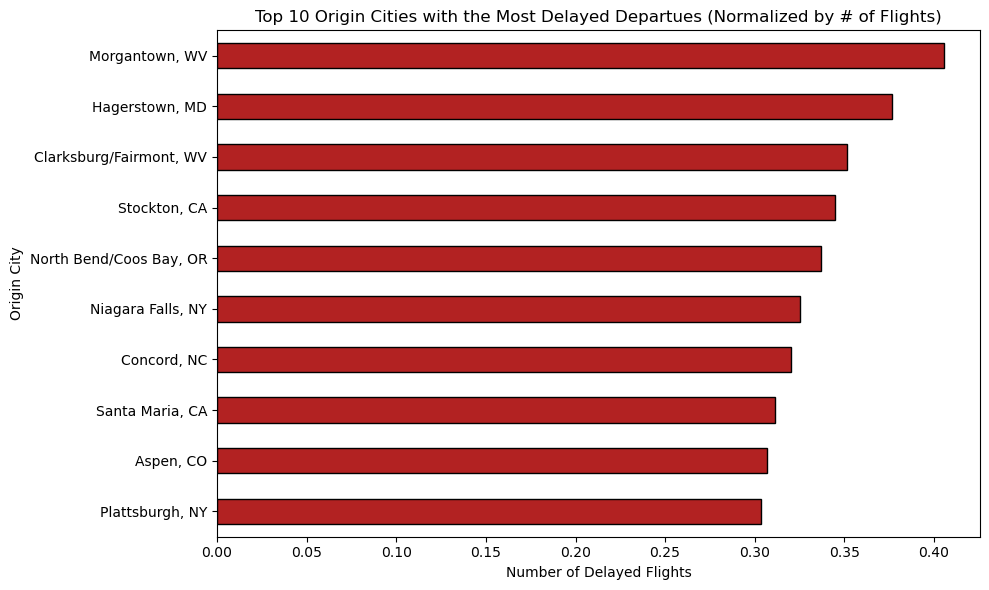

In [25]:
total_flights = df_completed.groupby("ORIGIN_CITY_NAME")["DEP_DEL15"].count()

delayed_flights = df_completed[df_completed["DEP_DEL15"] == 1]
delayed_counts = delayed_flights.groupby("ORIGIN_CITY_NAME")["DEP_DEL15"].count()

delay_rate = (delayed_counts / total_flights).sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
delay_rate.sort_values().plot(kind="barh", color="firebrick", edgecolor="black")

plt.title("Top 10 Origin Cities with the Most Delayed Departues (Normalized by # of Flights)")
plt.xlabel("Number of Delayed Flights")
plt.ylabel("Origin City")
plt.tight_layout()
plt.show()

In [29]:
df_completed = df[df['CANCELLED'] == 0]
df_completed

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,ARR_TIME,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,index,DEST_AIRPORT_NAME,AIRLINE_NAME,ORIGIN_AIRPORT_NAME,FLIGHT_DATE
0,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10423,1042302,"Austin, TX",700,707.0,7.0,0.0,0.0,950.0,15.0,1.0,1.0,0.0,NaN,95.0,103.0,619.0,7.0,0.0,8.0,0.0,0.0,0,"Austin, TX: Austin - Bergstrom International",Southwest Airlines Co.: WN,"Albuquerque, NM: Albuquerque International Sun...",2024-01-01
1,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10423,1042302,"Austin, TX",1830,1826.0,0.0,0.0,-1.0,2112.0,2.0,0.0,0.0,0.0,NaN,100.0,106.0,619.0,0.0,0.0,0.0,0.0,0.0,1,"Austin, TX: Austin - Bergstrom International",Southwest Airlines Co.: WN,"Albuquerque, NM: Albuquerque International Sun...",2024-01-01
2,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10800,1080003,"Burbank, CA",1420,1426.0,6.0,0.0,0.0,1516.0,0.0,0.0,-1.0,0.0,NaN,130.0,110.0,672.0,0.0,0.0,0.0,0.0,0.0,2,"Burbank, CA: Bob Hope",Southwest Airlines Co.: WN,"Albuquerque, NM: Albuquerque International Sun...",2024-01-01
3,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10821,1082106,"Baltimore, MD",1500,1514.0,14.0,0.0,0.0,2050.0,15.0,1.0,1.0,0.0,NaN,215.0,216.0,1670.0,14.0,0.0,1.0,0.0,0.0,3,"Baltimore, MD: Baltimore/Washington Internatio...",Southwest Airlines Co.: WN,"Albuquerque, NM: Albuquerque International Sun...",2024-01-01
4,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",11259,1125904,"Dallas, TX",530,527.0,0.0,0.0,-1.0,805.0,0.0,0.0,-1.0,0.0,NaN,105.0,98.0,580.0,0.0,0.0,0.0,0.0,0.0,4,"Dallas, TX: Dallas Love Field",Southwest Airlines Co.: WN,"Albuquerque, NM: Albuquerque International Sun...",2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7546982,2024,4,12,31,2,20436,15304,1530402,"Tampa, FL",15356,1535602,"Trenton, NJ",505,454.0,0.0,0.0,-1.0,720.0,0.0,0.0,-2.0,0.0,NaN,157.0,146.0,955.0,0.0,0.0,0.0,0.0,0.0,7546982,"Trenton, NJ: Trenton Mercer",Frontier Airlines Inc.: F9,"Tampa, FL: Tampa International",2024-12-31
7546983,2024,4,12,31,2,20436,15356,1535602,"Trenton, NJ",13204,1320402,"Orlando, FL",645,638.0,0.0,0.0,-1.0,929.0,0.0,0.0,-1.0,0.0,NaN,173.0,171.0,896.0,0.0,0.0,0.0,0.0,0.0,7546983,"Orlando, FL: Orlando International",Frontier Airlines Inc.: F9,"Trenton, NJ: Trenton Mercer",2024-12-31
7546984,2024,4,12,31,2,20436,15356,1535602,"Trenton, NJ",13204,1320402,"Orlando, FL",1441,1426.0,0.0,0.0,-1.0,1712.0,0.0,0.0,-2.0,0.0,NaN,171.0,166.0,896.0,0.0,0.0,0.0,0.0,0.0,7546984,"Orlando, FL: Orlando International",Frontier Airlines Inc.: F9,"Trenton, NJ: Trenton Mercer",2024-12-31
7546985,2024,4,12,31,2,20436,15356,1535602,"Trenton, NJ",14027,1402702,"West Palm Beach/Palm Beach, FL",600,606.0,6.0,0.0,0.0,855.0,0.0,0.0,-1.0,0.0,NaN,177.0,169.0,985.0,0.0,0.0,0.0,0.0,0.0,7546985,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",Frontier Airlines Inc.: F9,"Trenton, NJ: Trenton Mercer",2024-12-31


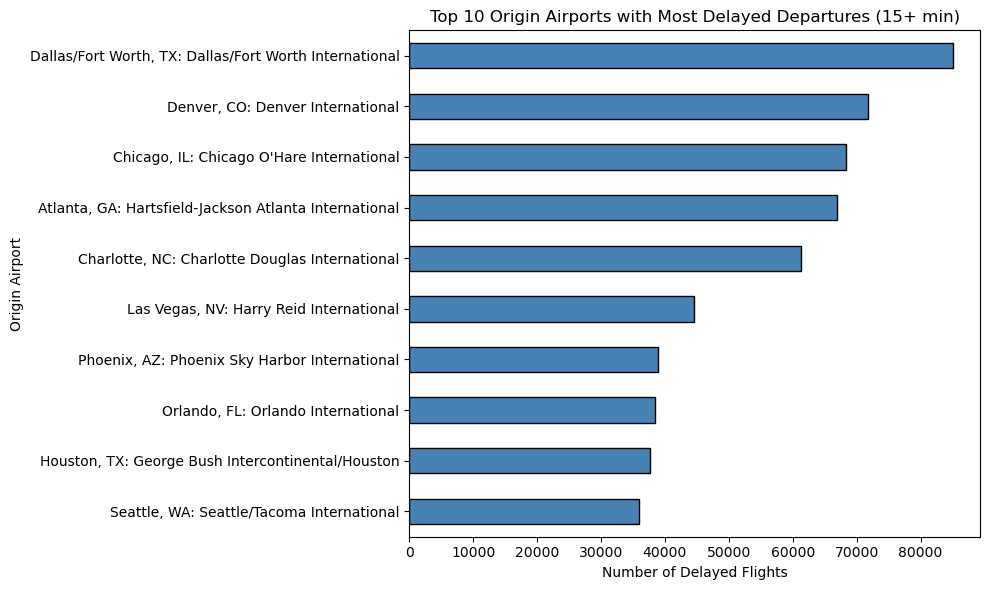

In [31]:
top_delayed_airports = delayed_flights["ORIGIN_AIRPORT_NAME"].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_delayed_airports.sort_values().plot(kind="barh", color="steelblue", edgecolor="black")
plt.title("Top 10 Origin Airports with Most Delayed Departures (15+ min)")
plt.xlabel("Number of Delayed Flights")
plt.ylabel("Origin Airport")
plt.tight_layout()
plt.show()

In [17]:
saipan = pd.read_csv("Saipan.csv")
saipan.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2024-01-01 00:00:00,28.0,26.1,30.6,0.3,0.0,NaN,18.4,NaN,1012.7,NaN
1,2024-01-02 00:00:00,27.7,26.1,30.6,0.3,0.0,NaN,17.3,NaN,1012.6,NaN
2,2024-01-03 00:00:00,27.5,25.6,30.0,3.0,0.0,NaN,15.8,NaN,1012.9,NaN
3,2024-01-04 00:00:00,27.5,25.6,30.6,7.1,0.0,NaN,15.8,NaN,1012.4,NaN
4,2024-01-05 00:00:00,27.2,25.6,30.0,2.0,0.0,NaN,13.3,NaN,1013.2,NaN


In [18]:
df['FLIGHT_DATE'] = pd.to_datetime(
    df[['YEAR', 'MONTH', 'DAY_OF_MONTH']].astype(str).agg('-'.join, axis=1),
    format='%Y-%m-%d'
)

In [19]:
df[['YEAR','MONTH','DAY_OF_MONTH','FLIGHT_DATE']].head()

,YEAR,MONTH,DAY_OF_MONTH,FLIGHT_DATE
0,2024,1,1,2024-01-01
1,2024,1,1,2024-01-01
2,2024,1,1,2024-01-01
3,2024,1,1,2024-01-01
4,2024,1,1,2024-01-01


In [22]:
def merge_weather_delay(df, weather_df, location_name):
    # Ensure dates are datetime and align
    weather_df['date'] = pd.to_datetime(weather_df['date']).dt.date
    df['FLIGHT_DATE'] = pd.to_datetime(df['FLIGHT_DATE']).dt.date

    # Filter flights for the specified origin city
    df_city = df[df['ORIGIN_CITY_NAME'].str.contains(location_name, case=False, na=False)]

    # Compute average daily weather delays
    daily_delays = (
        df_city.groupby('FLIGHT_DATE')['WEATHER_DELAY']
        .mean()
        .reset_index()
        .rename(columns={'WEATHER_DELAY': 'avg_weather_delay'})
    )

    # Merge with weather dataset
    merged = pd.merge(
        weather_df,
        daily_delays,
        left_on='date',
        right_on='FLIGHT_DATE',
        how='left'
    )

    return merged


In [32]:
dallas = pd.read_csv("dallas.csv")
dallas.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2024-01-01 00:00:00,3.8,0.6,7.8,0.0,NaN,NaN,17.6,NaN,1026.8,NaN
1,2024-01-02 00:00:00,4.9,1.1,9.4,NaN,NaN,NaN,5.5,NaN,1023.8,NaN
2,2024-01-03 00:00:00,8.1,5.6,12.8,NaN,NaN,NaN,6.7,NaN,1020.9,NaN
3,2024-01-04 00:00:00,8.6,2.8,14.4,NaN,NaN,NaN,13.5,NaN,1019.0,NaN
4,2024-01-05 00:00:00,8.8,7.2,11.1,NaN,NaN,NaN,13.7,NaN,1011.3,NaN


In [59]:
merged = merge_weather_delay(df_completed, dallas, 'Dallas')
merged.shape

(366, 13)

In [60]:
numeric_cols = merged.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Look specifically at correlations with avg_weather_delay
corr_with_delay = corr_matrix['avg_weather_delay'].sort_values(ascending=False)
print(corr_with_delay)

avg_weather_delay    1.000000
prcp                 0.734479
wspd                 0.110883
pres                -0.041925
tmin                -0.071938
tavg                -0.103466
tmax                -0.140559
snow                      NaN
wdir                      NaN
wpgt                      NaN
tsun                      NaN
Name: avg_weather_delay, dtype: float64


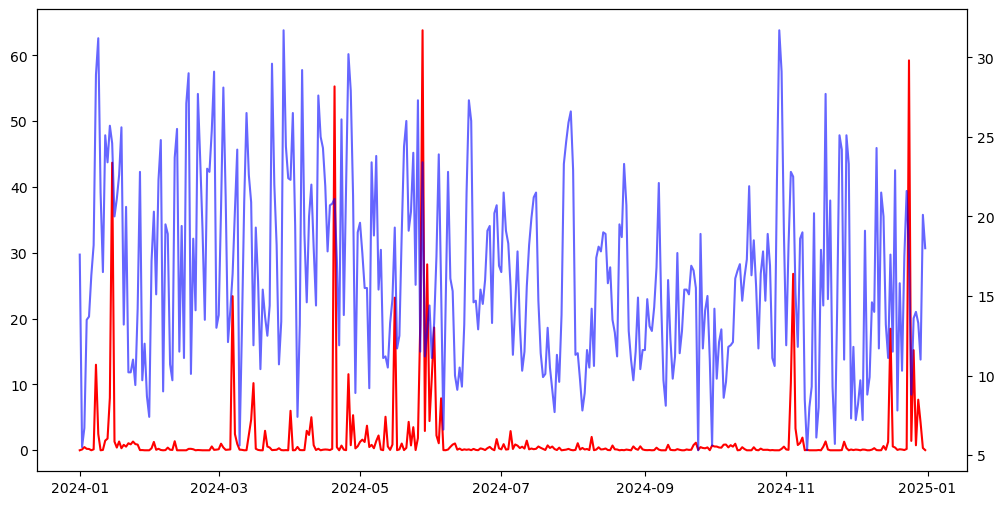

In [39]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(merged['date'], merged['avg_weather_delay'], label='Avg Weather Delay', color='red')
ax2 = ax1.twinx()
ax2.plot(merged['date'], merged['wspd'], label='Precipitation', color='blue', alpha=0.6)

In [40]:
denver = pd.read_csv('denver.csv')
merged = merge_weather_delay(df_completed, denver, 'Denver')
merged.shape

/var/folders/h1/w_jtl0654ns96y8ngd075fj40000gn/T/ipykernel_26850/1538528976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FLIGHT_DATE'] = pd.to_datetime(df['FLIGHT_DATE']).dt.date


(366, 13)

In [43]:
merged.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,FLIGHT_DATE,avg_weather_delay
0,2024-01-01,0.8,-7.1,12.8,0.0,0,NaN,11.2,NaN,1020.5,NaN,2024-01-01,0.870392
1,2024-01-02,2.1,-4.9,9.4,0.0,0,NaN,10.8,NaN,1020.8,NaN,2024-01-02,0.071429
2,2024-01-03,0.2,-8.8,8.3,0.0,0,NaN,16.6,NaN,1017.8,NaN,2024-01-03,1.741676
3,2024-01-04,-3.2,-6.0,0.6,0.0,0,NaN,9.7,NaN,1014.2,NaN,2024-01-04,0.407925
4,2024-01-05,-1.7,-5.5,5.6,0.0,0,NaN,10.8,NaN,1012.4,NaN,2024-01-05,0.115607


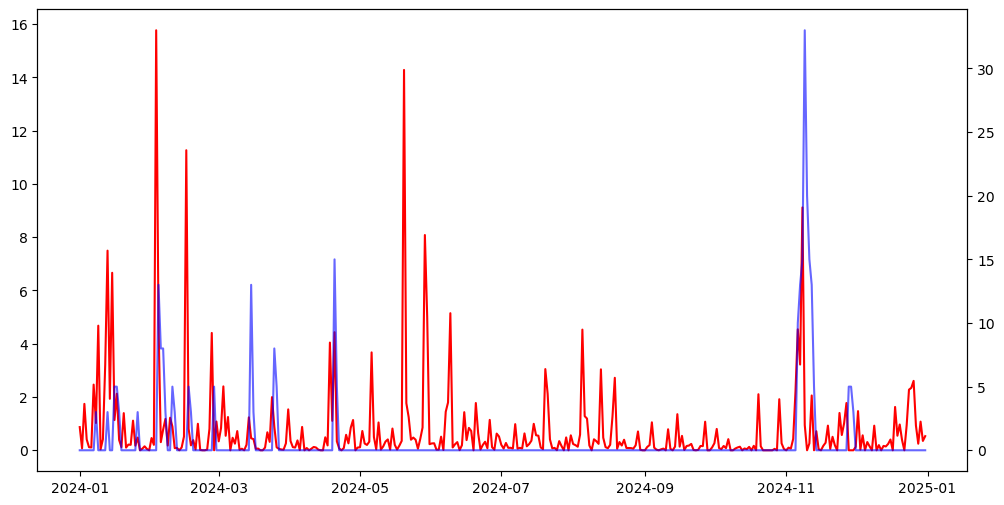

In [45]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(merged['date'], merged['avg_weather_delay'], label='Avg Weather Delay', color='red')
ax2 = ax1.twinx()
ax2.plot(merged['date'], merged['snow'], label='Precipitation', color='blue', alpha=0.6)

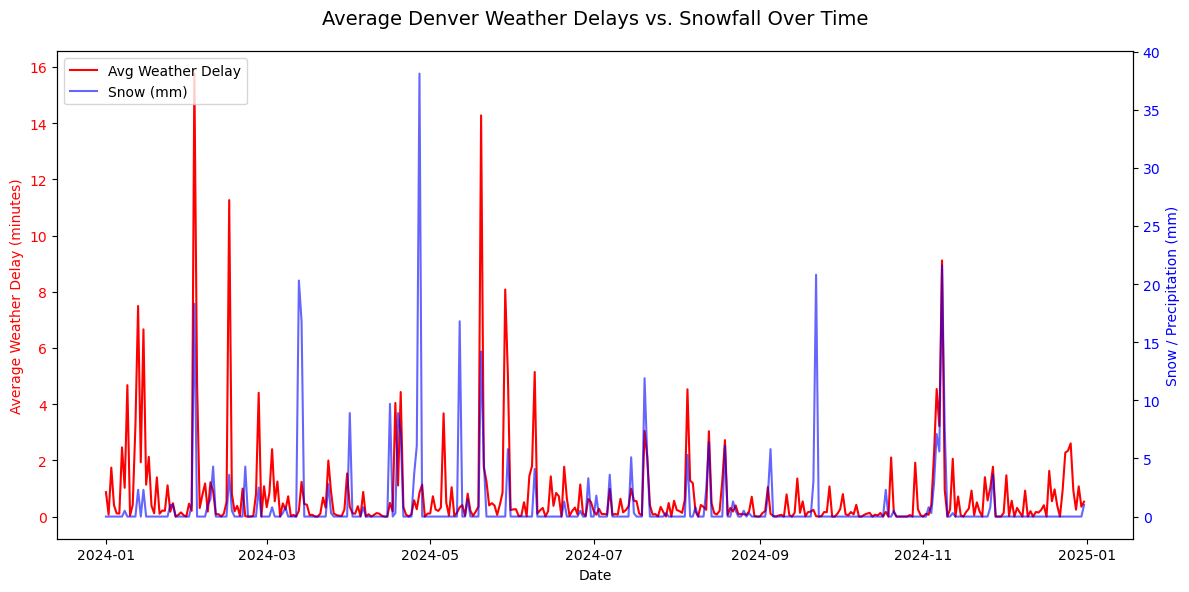

In [58]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average weather delay (left y-axis)
ax1.plot(merged['date'], merged['avg_weather_delay'], color='red', label='Avg Weather Delay')
ax1.set_xlabel("Date")
ax1.set_ylabel("Average Weather Delay (minutes)", color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Plot snow/precipitation (right y-axis)
ax2 = ax1.twinx()
ax2.plot(merged['date'], merged['prcp'], color='blue', alpha=0.6, label='Snow (mm)')
ax2.set_ylabel("Snow / Precipitation (mm)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and combined legend
fig.suptitle("Average Denver Weather Delays vs. Snowfall Over Time", fontsize=14)

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

In [57]:
numeric_cols = merged.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Look specifically at correlations with avg_weather_delay
corr_with_delay = corr_matrix['avg_weather_delay'].sort_values(ascending=False)
print(corr_with_delay)

avg_weather_delay    1.000000
prcp                 0.411104
snow                 0.163579
wspd                 0.040551
pres                -0.007659
tmin                -0.187074
tavg                -0.207786
tmax                -0.267377
wdir                      NaN
wpgt                      NaN
tsun                      NaN
Name: avg_weather_delay, dtype: float64
